### 1. General architecture of neural network
![](neuralnet.png) 
##### 1. At input layer 784 = 28 x 28 neurons are present but have shown few neurons to keep diagram simple.
##### 2. Hidden layer contains 128 neurons
##### 3. At output layer 10 neurons correspoding to 10 classes are present.
##### 4. y1,y2 and y3 are predicted probabilities and t1,t2 and t3 are actual labels of the dataset.



### 2. Derivation

\begin{align}
At \ the\ output\ layer, cost \ function \ is \ as \ given \ below \\
\end{align}
\begin{align}
        L &= \frac{\ 1}{\ N} \sum_{i=1}^{\ N} \ -log (\frac{\ e^{s_c}}{\sum_{j}e^{s_j}}) + \lambda* \sum_{k}\sum_{l}{W^2}_{k,l}    --------               (1)
\end{align}
\begin{align}
        Let \ S_i = \sum_{j}h_jw_{ji} + b_j   --------          (2)
\end{align}
\begin{align}
where \ h_j \ is \ the \ output \ from \ hidden \ layer \ and \ given \ as \ input \ to \ the \ output \ layer \ after\  performing \ sigmoid \ activation.
\end{align}
\begin{align}
We\ have\ derivative\ of\ softmax\ as,\ Case\ 1\ for\ correct\ class\ where\ i=k\
\end{align}
\begin{align}
Given\ softmax\ function\ as,\ y_i = \frac{e^{s_i}}{\sum_{c}^{\ nclass}e^{s_c}}, where \ s_i \ is\ the\ correct\ class
\end{align}
\begin{align}
\frac{\partial y_i}{\partial s_k} = \frac{\partial (\frac {e^{s_i}}{\sum_{c}^{nclass} e^{s_c}})}{\partial s_k}
\end{align}
\begin{align}
     = \frac{e^{s_i}\sum_{}e^{s_c} - e^{s_i}e^{s_i}}{[\sum_{i}e^{s_c}]^2}
\end{align}
\begin{align}
     = \frac{e^{s_i}}{\sum_{c}e^{s_i}} * \frac{\sum_{c}e^{s_c} - e^{s_i}}{\sum_{c}e^{s_c}}
\end{align}
\begin{align}
    = \frac{e^{s_i}}{\sum_{c}e^{s_c}} * (1 - \frac{e^{s_i}}{\sum_{c}e^{s_c}}) = y_i*(1-y_i) ---------- (3)
\end{align}
\begin{align}
Case\ 2\ when\ i \neq k \, for\ incorrect\ class 
\end{align}
\begin{align}
\frac{\partial y_i}{\partial s_k} = \frac{\partial (\frac {e^{s_i}}{\sum_{c}^{nclass} e^{s_c}})}{\partial s_k}
\end{align}
\begin{align}
= 0 - \frac{e^{s_i} e^{s_k}}{[\sum_{c}^{nclass} e^{s_c}]^2}
\end{align}
\begin{align}
= \frac{-e^{s_i}}{\sum_{c}^{nclass}} * \frac{-e^{s_k}}{\sum_{c}^{nclass}} = -y_i*y_k --------- (4)
\end{align}
\begin{align}
Now\ computing\ gradients\ at\ output\ layer\
\end{align}
\begin{align}
\frac{\partial L}{\partial w_{ji}} = \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial s_k} \frac{\partial s_i}{\partial w_{ji}}
\end{align}
\begin{align}
Now,\frac{\partial L}{\partial y_i} = \frac{-1}{y_i} \ and\ \frac{\partial y_i}{\partial s_k} = y_i*(1-y_i)\ for\ i=k\ and\ \frac{\partial y_i}{\partial s_k} = -y_i*y_k\ for\ i\neq k\ also\ \frac{\partial s_i}{\partial w_{ji}} = h_j
\end{align}
\begin{align}
\frac{\partial L}{\partial s_i} = \sum_{k} \frac{\partial L}{\partial y_k} \frac{\partial y_k}{\partial s_i}
\end{align}
\begin{align}
= \frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial s_i} - \sum_{k \neq i} \frac{\partial L}{\partial y_k} \frac{\partial y_k}{\partial s_i}
\end{align}
\begin{align}
= -1 + y_i + \sum_{k \neq i} -y_i\    [using\ equation\ 3\ and\ 4\ for\ both\ correct\ and\ incorrect\ class]
\end{align}
\begin{align}
= -1 + y_i (1+ \sum_{k \neq i}1) 
\end{align}
\begin{align}
\frac{\partial L}{\partial s_i}=y_i -1 --------- (5)
\end{align}
\begin{align}
finally,\ \frac{\partial L}{\partial w_{ji}} = \frac{1}{N} \sum_{}(y_i-1)h_j --------- (6)
\end{align}
\begin{align}
Now\ gradient\ of\ loss\ w.r.t\ bias,\ \frac{\partial L}{\partial b_j} =  \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial s_k}\frac{\partial s_i}{\partial b_j}
\end{align}
\begin{align}
= \frac{1}{N} \sum_{}(y_i-1) = y_i -1 --------- (7)
\end{align}
\begin{align}
\\
\end{align}
\begin{align}
Now\ computing\ gradients\ for\ hidden\ layer\ using\ chain\ rule\ (backpropagation)
\end{align}
\begin{align}
units\ in\ the\ hidden\ layer\ is\ indexed\ by\ j\ ,\ s^1_j = weighted\ input\ sum\ at\ hidden\ unit\ j\ for\ first\ hidden\ layer\\
i.e. s^1_j = \sum_{} x_iw_{ji} + b_j\ and\ h_j= \frac{1}{1+e^-s_j}\ is\ sigmoid\ activation\ at\ unit\ j\
\end{align}
\begin{align}
we\ have\ derivative\ of\ sigmoid\ function\ as\ , h = \frac{1}{1+e^-s}\ where\ s = wx+b\ ,\ x\ is\ input\ features
\end{align}
\begin{align}
\frac{\partial h}{\partial s} = \frac{e^-s}{(1+e^-s)^2}
\end{align}
\begin{align}
= \frac{1}{1+e^-s} * \frac{e^-s}{1+e^-s} = h(1-h) ------- (8)
\end{align}
\begin{align}
\frac{\partial L}{\partial s^1_j} = \sum_{i=1}^{hout} \frac{\partial L}{\partial s_i} \frac{\partial s_i}{\partial h_j}\frac{\partial h_j}{\partial s^1_j}\ ,\ here\ s_i\ is\ the\ weighted\ sum\ of\ input\ at\ output\ layer\  (mentioned\ in\ equation\ (2))\ and\ s^1_j\ is\ the\ weighted\ sum\ of\ input\ at\ hidden\ layer\
\end{align}
\begin{align}
\frac{\partial L}{\partial s^1_j} = \sum_{i=1}^{hout}(y_i-1)(w_{ji})(h_j(1-h_j))\ [using\ equations\ (5)\ and\ (8)]
\end{align}
\begin{align}
Now, \frac{\partial L}{\partial w^1_{kj}} = \frac{\partial L}{\partial s^1_j}\frac{\partial s^1_j}{\partial w^1_{kj}} = \sum_{i=1}^{hout}(y_i-1)(w_{ji})(h_j(1-h_j))(x_k)
\end{align}
\begin{align}
Similarly\ for\ bias\ we\ have,\ \frac{\partial L}{\partial b^1_j} = \frac{\partial L}{\partial s^1_j}\frac{\partial s^1_j}{\partial b^1_j} = \sum_{i=1}^{hout}(y_i-1)(w_{ji})(h_j(1-h_j))
\end{align}

### 3. Creating neural network using python and implementing stochastic gradient descent

In [29]:
import torch
import numpy as np
import torch.nn as nn
from urllib import request
import matplotlib.pyplot as plt
from torch.utils.data import sampler
from torchvision import datasets, transforms

In [30]:
# Downloading dataset and splitting them into training, validation and testing set

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_fashion_mnist():
    base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    #download_fashion_mnist()
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

num_training = 59000
num_validation = 1000
num_test = 10000

download_fashion_mnist()
X_train, y_train = load_fashion_mnist('.', kind='train')
X_test, y_test = load_fashion_mnist('.', kind='t10k') 

# subsample the data
# Validation set
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
# Training set
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
# Subsample of test set
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Normalize image
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
mean_image = np.mean(X_train, axis = 0)
X_train = X_train - mean_image
X_val = X_val - mean_image
X_test = X_test - mean_image

Download complete.


Epoch: 0/10..  Training Loss: 1.495..  Training Accuracy: 49.990%.. Validation Loss: 0.916..  Validation Accuracy: 66.600%..
Epoch: 1/10..  Training Loss: 0.762..  Training Accuracy: 74.636%.. Validation Loss: 0.725..  Validation Accuracy: 71.700%..
Epoch: 2/10..  Training Loss: 0.648..  Training Accuracy: 78.675%.. Validation Loss: 0.618..  Validation Accuracy: 76.500%..
Epoch: 3/10..  Training Loss: 0.591..  Training Accuracy: 81.232%.. Validation Loss: 0.588..  Validation Accuracy: 78.400%..
Epoch: 4/10..  Training Loss: 0.562..  Training Accuracy: 82.580%.. Validation Loss: 0.512..  Validation Accuracy: 82.700%..
Epoch: 5/10..  Training Loss: 0.534..  Training Accuracy: 83.690%.. Validation Loss: 0.478..  Validation Accuracy: 84.400%..
Epoch: 6/10..  Training Loss: 0.526..  Training Accuracy: 84.110%.. Validation Loss: 0.481..  Validation Accuracy: 83.900%..
Epoch: 7/10..  Training Loss: 0.517..  Training Accuracy: 84.425%.. Validation Loss: 0.513..  Validation Accuracy: 82.300%..


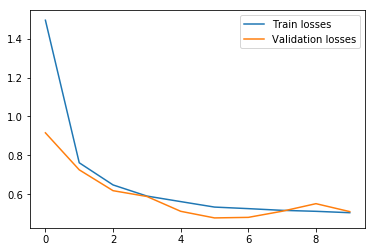

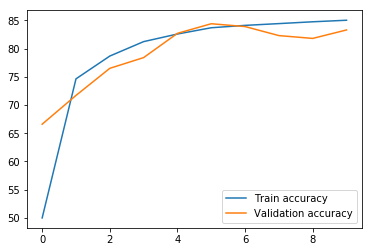

In [31]:
# Basic neural model using python involving one hidden layer

class OneLayerNet(object):
    
    def __init__(self, input_size, hidden_size, output_size, std=1e-2):
        self.layerParams = {}
        self.layerParams['W1'] = std *  np.random.rand(input_size, hidden_size)
        self.layerParams['b1'] = np.zeros(hidden_size)
        self.layerParams['W2'] = std *  np.random.rand(hidden_size, output_size)
        self.layerParams['b2'] = np.zeros(output_size)
    
    def loss(self, X, y, reg = 0.1):
        W1 = self.layerParams['W1']
        b1 = self.layerParams['b1']
        W2 = self.layerParams['W2']
        b2 = self.layerParams['b2']
        N, D = X.shape
        
        # forward pass
        Z = X.dot(W1) + b1
        out = 1/(1 + np.exp(-Z)) # sigmoid at hidden layer
        scores = out.dot(W2) + b2
        
        # loss computation
        
        loss = 0.0
        num_train = X.shape[0]
        exp_scores = np.exp(scores - np.max(scores))
        norm_exp_scores = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True) # softmax scores
        
        neg_log_likelihood = - np.log(norm_exp_scores[range(num_train),y])
  
        data_loss = np.sum(neg_log_likelihood) / num_train
        loss = data_loss  + 0.5 * reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
        
        
        # backward pass with gradients computation
        grads = {}
        num_train = X.shape[0]
        
        dscores = norm_exp_scores
        dscores[range(N), y] -= 1.0
        dscores /= N

        # backpropgate into W2 and b2
        grads["b2"] = np.sum(dscores, axis = 0, keepdims = True)
        grads["W2"] = np.dot(out.T, dscores)
        grads["W2"] += 2 * reg * W2
        
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        dhidden = dhidden * out * (1 - out)
        
        #dhidden = np.dot(W2.T, dscores * out * (1 - out))
        
        grads["b1"] = np.sum(dhidden, axis = 0, keepdims = True)
        grads["W1"] = np.dot(X.T, dhidden)
        grads["W1"] += 2 * reg * W1
        
        
        
        return loss, grads
    
    def train(self, X_train, y_train, X_val, y_val, num_epochs = 10, lr = 1e-3, reg = 5e-6):
        
        num_train = X_train.shape[0]
        num_val = X_val.shape[0]
        
        train_losses = []
        val_losses = []
        train_accs = []
        val_accs = []
        
        n_samples = len(y_train)
        n_val_samples = len(y_val)
        for epoch in range(num_epochs):
            train_loss = 0
            val_loss = 0
            train_acc = 0 
            val_acc = 0
            
            for i in range(n_samples):
                #rand_index = np.random.rand(0,n_samples)
                rand_index = np.random.choice(num_train, 1)
                X_i = X_train[rand_index, :].reshape(1, X_train.shape[1])
                y_i = y_train[rand_index].reshape(1, 1)
                
                loss,grads = self.loss(X_i, y_i, reg = reg)
                train_loss += loss
                
                b1 = self.layerParams['b1'].reshape(1,-1)
                b2 = self.layerParams['b2'].reshape(1,-1)
                
                self.layerParams['W1'] -= lr * grads["W1"]
                b1 -= lr * grads["b1"]
                self.layerParams['b1'] = b1

                self.layerParams['W2'] -= lr * grads["W2"]
                b2 -= lr * grads["b2"]
                self.layerParams['b2'] = b2
                
                train_acc += (self.predict(X_i) == y_i)
                
                    
            for j in range(n_val_samples):
                #rand_index = np.random.rand(0,n_val_samples)
                rand_index = np.random.choice(num_val, 1)
                X_val_j = X_val[rand_index, :].reshape(1, X_val.shape[1])
                y_val_j = y_val[rand_index].reshape(1, 1) 
                       
                loss_val,_ = self.loss(X_val_j, y_val_j, reg = reg)
                val_loss += loss_val
                       
                val_acc += (self.predict(X_val_j) == y_val_j)
                       
                
            print("Epoch: {}/{}.. ".format(epoch, num_epochs),
              "Training Loss: {:.3f}.. ".format(train_loss / n_samples),
              "Training Accuracy: {:.3f}%..".format(train_acc[0][0] / n_samples * 100),
              "Validation Loss: {:.3f}.. ".format(val_loss / n_val_samples),
              "Validation Accuracy: {:.3f}%..".format(val_acc[0][0] /n_val_samples * 100)
              )
            
            train_losses.append(train_loss/n_samples)
            val_losses.append(val_loss/n_val_samples)
            train_accs.append(train_acc[0][0]/n_samples*100)
            val_accs.append(val_acc[0][0]/n_val_samples*100)
            
        return train_losses,val_losses,train_accs,val_accs
        
    def predict(self, X):
        
        W1, b1 = self.layerParams['W1'], self.layerParams['b1']
        W2, b2 = self.layerParams['W2'], self.layerParams['b2']
        N, D = X.shape
        
        Z = X.dot(W1) + b1
        out = 1/(1 + np.exp(-Z))
        out = out.dot(W2) + b2
           
        y_pred = np.argmax(out, axis = 1)
           
        return y_pred
           
    def evaluate(self, X_test, y_test):
        W1, b1 = self.layerParams['W1'], self.layerParams['b1']
        W2, b2 = self.layerParams['W2'], self.layerParams['b2']
        N, D = X_test.shape
        
        num_test = len(y_test)
        correct = 0
        for i in range(num_test):
            #rand_index = np.random.rand(0,n_samples)
            rand_index = np.random.choice(num_test, 1)
            X_test_i = X_test[rand_index, :].reshape(1, X_test.shape[1])
            y_test_i = y_test[rand_index].reshape(1, 1)
            
            
            W = X_test_i.dot(W1) + b1
            out = np.maximum(0, W)
            out = out.dot(W2) + b2
          
            y_pred = np.argmax(out, axis = 1)
            
            correct += (y_pred == y_test_i).sum()
            
        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / num_test))

net = OneLayerNet(X_train.shape[1], 200, 10)
train_losses,val_losses,train_accs,val_accs = net.train(X_train, y_train, X_val, y_val, 10, 0.001, 0.0005)
net.evaluate(X_test, y_test)
        
plt.figure()           
plt.plot(train_losses,label = "Train losses")
plt.plot(val_losses, label = "Validation losses")
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accs,label = "Train accuracy")
plt.plot(val_accs, label = "Validation accuracy")
plt.legend() 
plt.show() 
            

#### Note:- Above code is written using python incorporates only implementation of stochastic gradient descent and L2 regularization. For analysis of loss, avergae accurracy and class wise accuracy plus impact of hyperparameters on model is being implemented using pytorch framework as mentioned in task 4.
#### From the above result we can see that using stochastic gradient descent (using single sample for training instead of mini batch) model achieves accuracy of 75.45% (may change a little bit if the model is trained again).
#### Both validation and training loss decreases gradually over no of epochs and still has potential to decrease further.

### 4. Performance of the network
#### (a) & (b). Basic neural network involving below mentioned hyperparameters
\begin{align}
no\ of\ hidden\ layers\ =\ 1  \\
no\ of\ hidden\ neurons\ =\ 128 \\
batch\ size\ =\ 32 \\
learning\ rate\ =\ 0.001 
\end{align}

In [21]:
num_epochs = 50
NUM_TRAIN = 59000

nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)

dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(dev)

transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(28, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5],std=[0.5])
                            ])
test_transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5],std=[0.5])
                            ])

train_data = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32,
                                         sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

fashionMnist_val = datasets.FashionMNIST('F_MNIST_data/', train=True, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(fashionMnist_val, batch_size=32,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 60000)))


# Download and load the test data
test_data = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

classes = {0: 'T - shirt / top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankleboot'}

cpu


In [22]:
class OneLayerNet(nn.Module):
    def __init__(self):
        super(OneLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        
        
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.softmax(out)
        
        return out
    
model = OneLayerNet()
model = model.to(dev)

/Users/surekhagaikwad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch: 0/50..  Training Loss: 2.302..  Validation Loss: 2.300..  Training Accuracy:  7.546%   Validation Accuracy: 13.770%
Epoch: 1/50..  Training Loss: 2.300..  Validation Loss: 2.298..  Training Accuracy:  16.235%   Validation Accuracy: 17.090%
Epoch: 2/50..  Training Loss: 2.298..  Validation Loss: 2.296..  Training Accuracy:  16.615%   Validation Accuracy: 15.625%
Epoch: 3/50..  Training Loss: 2.295..  Validation Loss: 2.293..  Training Accuracy:  15.844%   Validation Accuracy: 16.406%
Epoch: 4/50..  Training Loss: 2.293..  Validation Loss: 2.291..  Training Accuracy:  16.448%   Validation Accuracy: 16.016%
Epoch: 5/50..  Training Loss: 2.289..  Validation Loss: 2.287..  Training Accuracy:  17.738%   Validation Accuracy: 18.066%
Epoch: 6/50..  Training Loss: 2.286..  Validation Loss: 2.283..  Training Accuracy:  18.261%   Validation Accuracy: 17.969%
Epoch: 7/50..  Training Loss: 2.282..  Validation Loss: 2.279..  Training Accuracy:  18.473%   Validation Accuracy: 19.531%
Epoch: 8/

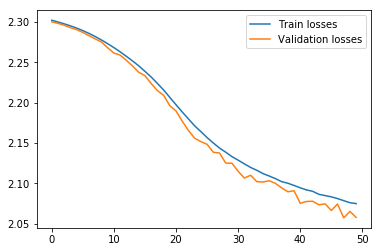

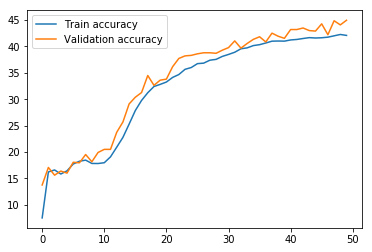

Average training accuracy of the model is: 32.006 %
Accuracy of T - shirt / top is  23.334%
Accuracy of Trouser is  43.490%
Accuracy of Pullover is  4.203%
Accuracy of Dress is  0.000%
Accuracy of Coat is  16.554%
Accuracy of Sandal is  57.665%
Accuracy of Shirt is  0.000%
Accuracy of Sneaker is  55.635%
Accuracy of Bag is  27.973%
Accuracy of Ankleboot is  0.000%



Average validation accuracy of the model is: 33.582 %
Accuracy of T - shirt / top is  23.633%
Accuracy of Trouser is  44.037%
Accuracy of Pullover is  3.910%
Accuracy of Dress is  0.000%
Accuracy of Coat is  16.863%
Accuracy of Sandal is  58.395%
Accuracy of Shirt is  0.000%
Accuracy of Sneaker is  56.211%
Accuracy of Bag is  28.468%
Accuracy of Ankleboot is  0.000%



Test Accuracy of the model on the 10000 test images: 45.66 %
Accuracy of T - shirt / top is  29.768%
Accuracy of Trouser is  69.234%
Accuracy of Pullover is  1.126%
Accuracy of Dress is  0.000%
Accuracy of Coat is  40.503%
Accuracy of Sandal is  72.055%
Accu

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

total_step = len(train_loader)
train_losses, val_losses, train_accs, val_accs, val_class_accs, train_class_accs = [],[],[],[],[],[]
val_class_acc = torch.zeros(10)
train_class_acc = torch.zeros(10)

def calculate_acc(labels, outputs):
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return float(correct) / float(total)

def class_acc(labels, predicted):
    for t, p in zip(labels.view(-1), predicted.view(-1)):
      confusion_matrix[t.long(), p.long()] += 1
                  
    return (confusion_matrix.diag()/confusion_matrix.sum(1) * 100)
  
  
for epoch in range(num_epochs):
    train_loss , val_loss, train_acc, val_acc = 0, 0, 0, 0
    for images,labels in train_loader:
        images = images.to(dev)
        labels = labels.to(dev)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        train_acc += calculate_acc(labels, outputs)
        _, predicted = torch.max(outputs.data, 1)
        train_class_acc += class_acc(labels, predicted)


    else:
        with torch.no_grad():
            model.eval()
            for images,labels in val_loader:
                images = images.to(dev)
                labels = labels.to(dev)

                val_out = model(images)
                loss = criterion(val_out, labels)
                val_loss += loss.item()

                val_acc += calculate_acc(labels, val_out)
                _, predicted = torch.max(val_out.data, 1)
                val_class_acc += class_acc(labels, predicted)

        model.train()

    print("Epoch: {}/{}.. ".format(epoch, num_epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_loader)),
              "Validation Loss: {:.3f}.. ".format(val_loss/len(val_loader)),
              "Training Accuracy: {: .3f}%  ".format(train_acc/len(train_loader)*100),
              "Validation Accuracy: {:.3f}%".format(val_acc/len(val_loader)*100))
    
    train_losses.append(train_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))
    train_accs.append(train_acc/len(train_loader)*100)
    val_accs.append(val_acc/len(val_loader)*100)
    val_class_accs.append(val_class_acc/len(val_loader))
    train_class_accs.append(train_class_acc/len(train_loader))


plt.figure()           
plt.plot(train_losses,label = "Train losses")
plt.plot(val_losses, label = "Validation losses")
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accs,label = "Train accuracy")
plt.plot(val_accs, label = "Validation accuracy")
plt.legend() 
plt.show()   


model.eval()

with torch.no_grad():
    correct = 0
    total = 0
for images, labels in test_loader:
        images = images.to(dev)
        labels = labels.to(dev)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
            
sum_train_acc = 0
sum_val_acc = 0
for i in range(num_epochs):
  sum_train_acc += train_accs[i]
  sum_val_acc += val_accs[i]

print('Average training accuracy of the model is: {:.3f} %'.format(sum_train_acc / num_epochs))
train_class_accs[:] = [x / num_epochs for x in train_class_accs]
for i in range(len(train_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(train_class_accs[len(train_class_accs)-1][i]).item()))

print('\n\n')
print('Average validation accuracy of the model is: {:.3f} %'.format(sum_val_acc / num_epochs))
val_class_accs[:] = [x / num_epochs for x in val_class_accs]
for i in range(len(val_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(val_class_accs[len(val_class_accs)-1][i]).item()))  
  
print('\n\n')  
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
accs = (confusion_matrix.diag()/confusion_matrix.sum(1) * 100).clone().detach()
for i in range(10):
  print('Accuracy of {} is {: .3f}%'.format(classes[i], accs[i]))


###### 1. After being training the model for 50 epochs with configured parameters and hyperparameters we can see that testing accuracy is at least higher compared to training and validation accuracies that shows the model is not overfitting and still has potential to learn further.
###### 2. Also we can see in the class wise accuracy of testing data set, model is not able to recognise data from classes "Pullover", "Shirt", "Sneaker" and "Ankleboot" as their indvidual accuracies are 0.
###### 3. Both training and validation loss decreases gradually over no of epochs.

### 4. (c) Now changing the learning rate and verifying its affect on loss and accuracy of the model.
##### For this case I have used learning rate scheduler were initially learning rate is set to 0.1 and with less value of momentum as 0.2. After every 20 epochs the learning rate decreases by gamma factor set as 0.1 . i.e after first  20 epoch it will become 0.1*0.1 = 0.001, similarly it will decrease by gamma factor after every next 20 epoch.

/Users/surekhagaikwad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch: 0/50..  Training Loss: 2.018..  Validation Loss: 1.972..  Training Accuracy:  46.002%   Validation Accuracy: 50.195%
Epoch: 1/50..  Training Loss: 1.968..  Validation Loss: 1.938..  Training Accuracy:  50.577%   Validation Accuracy: 54.199%
Epoch: 2/50..  Training Loss: 1.944..  Validation Loss: 1.928..  Training Accuracy:  52.712%   Validation Accuracy: 54.883%
Epoch: 3/50..  Training Loss: 1.933..  Validation Loss: 1.918..  Training Accuracy:  53.654%   Validation Accuracy: 54.688%
Epoch: 4/50..  Training Loss: 1.924..  Validation Loss: 1.909..  Training Accuracy:  54.390%   Validation Accuracy: 56.152%
Epoch: 5/50..  Training Loss: 1.920..  Validation Loss: 1.908..  Training Accuracy:  54.585%   Validation Accuracy: 55.371%
Epoch: 6/50..  Training Loss: 1.914..  Validation Loss: 1.899..  Training Accuracy:  55.167%   Validation Accuracy: 56.543%
Epoch: 7/50..  Training Loss: 1.881..  Validation Loss: 1.870..  Training Accuracy:  59.404%   Validation Accuracy: 60.742%
Epoch: 8

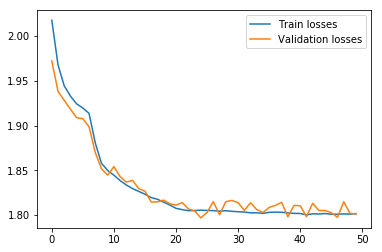

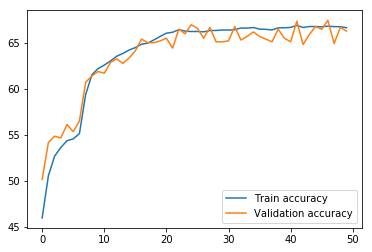

Average training accuracy of the model is: 63.785 %
Accuracy of T - shirt / top is  44.955%
Accuracy of Trouser is  76.012%
Accuracy of Pullover is  21.073%
Accuracy of Dress is  17.810%
Accuracy of Coat is  50.329%
Accuracy of Sandal is  72.580%
Accuracy of Shirt is  0.000%
Accuracy of Sneaker is  66.800%
Accuracy of Bag is  60.334%
Accuracy of Ankleboot is  0.000%



Average validation accuracy of the model is: 63.666 %
Accuracy of T - shirt / top is  45.203%
Accuracy of Trouser is  76.124%
Accuracy of Pullover is  21.417%
Accuracy of Dress is  18.167%
Accuracy of Coat is  50.498%
Accuracy of Sandal is  72.610%
Accuracy of Shirt is  0.000%
Accuracy of Sneaker is  66.938%
Accuracy of Bag is  60.533%
Accuracy of Ankleboot is  0.000%



Test Accuracy of the model on the 10000 test images: 67.74 %
Accuracy of T - shirt / top is  79.400%
Accuracy of Trouser is  93.500%
Accuracy of Pullover is  68.000%
Accuracy of Dress is  85.500%
Accuracy of Coat is  82.500%
Accuracy of Sandal is  83.000

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.2)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 20, gamma=0.1)

total_step = len(train_loader)
train_losses, val_losses, train_accs, val_accs, val_class_accs, train_class_accs = [],[],[],[],[],[]
val_class_acc = torch.zeros(10)
train_class_acc = torch.zeros(10)

def calculate_acc(labels, outputs):
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return float(correct) / float(total)

def class_acc(labels, predicted):
    for t, p in zip(labels.view(-1), predicted.view(-1)):
      confusion_matrix[t.long(), p.long()] += 1
    return (confusion_matrix.diag()/confusion_matrix.sum(1) * 100)
  
for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    train_acc = 0
    val_acc = 0
    for images,labels in train_loader:
        images = images.to(dev)
        labels = labels.to(dev)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

       
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        train_acc += calculate_acc(labels, outputs)
        _, predicted = torch.max(outputs.data, 1)
        train_class_acc += class_acc(labels, predicted)
        
    else:
        with torch.no_grad():
            model.eval()
            for images,labels in val_loader:
                images = images.to(dev)
                labels = labels.to(dev)

                val_out = model(images)
                loss = criterion(val_out, labels)
                val_loss += loss.item()

                val_acc += calculate_acc(labels, val_out)
                _, predicted = torch.max(val_out.data, 1)
                val_class_acc += class_acc(labels, predicted)
        model.train()

    print("Epoch: {}/{}.. ".format(epoch, num_epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_loader)),
              "Validation Loss: {:.3f}.. ".format(val_loss/len(val_loader)),
              "Training Accuracy: {: .3f}%  ".format(train_acc/len(train_loader)*100),
              "Validation Accuracy: {:.3f}%".format(val_acc/len(val_loader)*100))
    
    scheduler.step()
    train_losses.append(train_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))
    train_accs.append(train_acc/len(train_loader)*100)
    val_accs.append(val_acc/len(val_loader)*100)
    val_class_accs.append(val_class_acc/len(val_loader))
    train_class_accs.append(train_class_acc/len(train_loader))


plt.figure()           
plt.plot(train_losses,label = "Train losses")
plt.plot(val_losses, label = "Validation losses")
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accs,label = "Train accuracy")
plt.plot(val_accs, label = "Validation accuracy")
plt.legend() 
plt.show()   


model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    correct = 0
    total = 0
for images, labels in test_loader:
        images = images.to(dev)
        labels = labels.to(dev)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sum_train_acc = 0
sum_val_acc = 0
for i in range(num_epochs):
  sum_train_acc += train_accs[i]
  sum_val_acc += val_accs[i]
  
print('Average training accuracy of the model is: {:.3f} %'.format(sum_train_acc / num_epochs))
train_class_accs[:] = [x / num_epochs for x in train_class_accs]
for i in range(len(train_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(train_class_accs[len(train_class_accs)-1][i]).item()))

print('\n\n')
print('Average validation accuracy of the model is: {:.3f} %'.format(sum_val_acc / num_epochs))
val_class_accs[:] = [x / num_epochs for x in val_class_accs]
for i in range(len(val_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(val_class_accs[len(val_class_accs)-1][i]).item()))  
  
print('\n\n')  
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
accs = (confusion_matrix.diag()/confusion_matrix.sum(1) * 100).clone().detach()
for i in range(10):
  print('Accuracy of {} is {: .3f}%'.format(classes[i], accs[i]))

###### 1. From the above plot we can see that by keeping learning rate as high in the beginning; potentially increased the accurcay of the model this in turn helps the model to reach the global optima/minima at faster rate.
###### 2. After 20 epocs learning rate decreases by gamma factor this will ensure that it does not overshoot the minima and can reach with smaller steps further.
###### 3. Accuracy on the testing dataset is higher compared to training and validation accuracy. This shows model does not overshoot and still has potential to learn further. Also it is better compared to previous basic model.
###### 4. From the class wise accuracy we can see that it is able to recognise most of the classes individually except one class "Ankleboot" for which individual accuracy is 0.

### 4. (d) Implementing momentum term.
##### For this I have set high value for momentum as 0.9 with nesterov momentum as true.

/Users/surekhagaikwad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch: 0/50..  Training Loss: 1.804..  Validation Loss: 1.808..  Training Accuracy:  66.455%   Validation Accuracy: 66.406%
Epoch: 1/50..  Training Loss: 1.802..  Validation Loss: 1.805..  Training Accuracy:  66.531%   Validation Accuracy: 65.820%
Epoch: 2/50..  Training Loss: 1.800..  Validation Loss: 1.795..  Training Accuracy:  66.808%   Validation Accuracy: 66.992%
Epoch: 3/50..  Training Loss: 1.799..  Validation Loss: 1.789..  Training Accuracy:  66.903%   Validation Accuracy: 67.578%
Epoch: 4/50..  Training Loss: 1.797..  Validation Loss: 1.807..  Training Accuracy:  67.093%   Validation Accuracy: 65.137%
Epoch: 5/50..  Training Loss: 1.796..  Validation Loss: 1.794..  Training Accuracy:  67.165%   Validation Accuracy: 66.895%
Epoch: 6/50..  Training Loss: 1.794..  Validation Loss: 1.797..  Training Accuracy:  67.307%   Validation Accuracy: 66.895%
Epoch: 7/50..  Training Loss: 1.793..  Validation Loss: 1.792..  Training Accuracy:  67.494%   Validation Accuracy: 67.676%
Epoch: 8

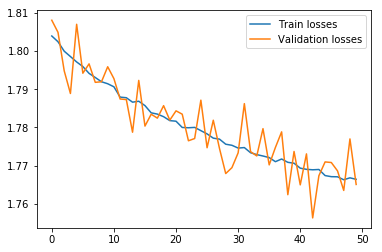

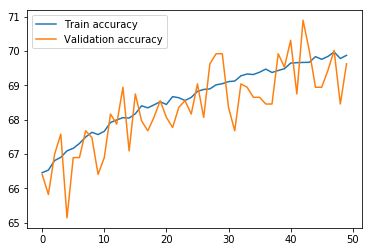

Average training accuracy of the model is: 68.624 %
Accuracy of T - shirt / top is  80.901%
Accuracy of Trouser is  92.668%
Accuracy of Pullover is  74.487%
Accuracy of Dress is  85.463%
Accuracy of Coat is  76.671%
Accuracy of Sandal is  83.535%
Accuracy of Shirt is  0.000%
Accuracy of Sneaker is  91.276%
Accuracy of Bag is  92.289%
Accuracy of Ankleboot is  0.000%



Average validation accuracy of the model is: 68.357 %
Accuracy of T - shirt / top is  80.935%
Accuracy of Trouser is  92.689%
Accuracy of Pullover is  74.541%
Accuracy of Dress is  85.471%
Accuracy of Coat is  76.655%
Accuracy of Sandal is  83.586%
Accuracy of Shirt is  0.000%
Accuracy of Sneaker is  91.292%
Accuracy of Bag is  92.303%
Accuracy of Ankleboot is  0.000%



Test Accuracy of the model on the 10000 test images: 69.36 %
Accuracy of T - shirt / top is  83.200%
Accuracy of Trouser is  95.700%
Accuracy of Pullover is  74.900%
Accuracy of Dress is  87.900%
Accuracy of Coat is  80.100%
Accuracy of Sandal is  78.700

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

total_step = len(train_loader)
train_losses, val_losses, train_accs, val_accs, val_class_accs, train_class_accs = [],[],[],[],[],[]
val_class_acc = torch.zeros(10)
train_class_acc = torch.zeros(10)

def calculate_acc(labels, outputs):
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return float(correct) / float(total)

def class_acc(labels, predicted):
    for t, p in zip(labels.view(-1), predicted.view(-1)):
      confusion_matrix[t.long(), p.long()] += 1
    return (confusion_matrix.diag()/confusion_matrix.sum(1) * 100)

for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    train_acc = 0
    val_acc = 0
    for images,labels in train_loader:
        images = images.to(dev)
        labels = labels.to(dev)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

         # Track the accuracy
        train_acc += calculate_acc(labels, outputs)
        _, predicted = torch.max(outputs.data, 1)
        train_class_acc += class_acc(labels, predicted)
    else:
        with torch.no_grad():
            model.eval()
            for images,labels in val_loader:
                images = images.to(dev)
                labels = labels.to(dev)

                val_out = model(images)
                loss = criterion(val_out, labels)
                val_loss += loss.item()

                val_acc += calculate_acc(labels, val_out)
                _, predicted = torch.max(val_out.data, 1)
                val_class_acc += class_acc(labels, predicted)
        model.train()

    print("Epoch: {}/{}.. ".format(epoch, num_epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_loader)),
              "Validation Loss: {:.3f}.. ".format(val_loss/len(val_loader)),
              "Training Accuracy: {: .3f}%  ".format(train_acc/len(train_loader)*100),
              "Validation Accuracy: {:.3f}%".format(val_acc/len(val_loader)*100))
    
    train_losses.append(train_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))
    train_accs.append(train_acc/len(train_loader)*100)
    val_accs.append(val_acc/len(val_loader)*100)
    val_class_accs.append(val_class_acc/len(val_loader))
    train_class_accs.append(train_class_acc/len(train_loader))


plt.figure()           
plt.plot(train_losses,label = "Train losses")
plt.plot(val_losses, label = "Validation losses")
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accs,label = "Train accuracy")
plt.plot(val_accs, label = "Validation accuracy")
plt.legend() 
plt.show()   

model.eval()  
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    correct = 0
    total = 0
for images, labels in test_loader:
        images = images.to(dev)
        labels = labels.to(dev)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

sum_train_acc = 0
sum_val_acc = 0
for i in range(num_epochs):
  sum_train_acc += train_accs[i]
  sum_val_acc += val_accs[i]
  
print('Average training accuracy of the model is: {:.3f} %'.format(sum_train_acc / num_epochs))
train_class_accs[:] = [x / num_epochs for x in train_class_accs]
for i in range(len(train_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(train_class_accs[len(train_class_accs)-1][i]).item()))

print('\n\n')
print('Average validation accuracy of the model is: {:.3f} %'.format(sum_val_acc / num_epochs))
val_class_accs[:] = [x / num_epochs for x in val_class_accs]
for i in range(len(val_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(val_class_accs[len(val_class_accs)-1][i]).item()))  
  
print('\n\n')  
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
accs = (confusion_matrix.diag()/confusion_matrix.sum(1) * 100).clone().detach()
for i in range(10):
  print('Accuracy of {} is {: .3f}%'.format(classes[i], accs[i]))


###### 1. From the above result we can see that average testing accuracy 69.36% (likely to change a little when the model is trained again) which is high compared to training and validation accuracy.
###### 2. Using momentum model is able to achieve better accuracy comaperd to just changing the learning rate using scheduler (as in previous model)
###### 3. Using momentum though we are able to achieve better accuracy but still model oscillates a lot on validation data so there are chances that it may skip the global minima.
###### 4. Class wise accuracy is quite better for all the three data sets but still it is not able to recognise some of the classes.

### 4. (e) After changing the no of hidden neuron compared to previous basic model
##### For this I have decreased the no of hidden neurons from 128 (as configured in previous basic model) to 64 and verified its affect on loss and accuracy of the model.

/Users/surekhagaikwad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch: 0/50..  Training Loss: 2.141..  Validation Loss: 2.048..  Training Accuracy:  33.808%   Validation Accuracy: 42.090%
Epoch: 1/50..  Training Loss: 2.018..  Validation Loss: 2.000..  Training Accuracy:  46.005%   Validation Accuracy: 47.949%
Epoch: 2/50..  Training Loss: 1.970..  Validation Loss: 1.953..  Training Accuracy:  51.291%   Validation Accuracy: 52.637%
Epoch: 3/50..  Training Loss: 1.917..  Validation Loss: 1.905..  Training Accuracy:  56.979%   Validation Accuracy: 57.520%
Epoch: 4/50..  Training Loss: 1.894..  Validation Loss: 1.897..  Training Accuracy:  58.675%   Validation Accuracy: 57.812%
Epoch: 5/50..  Training Loss: 1.881..  Validation Loss: 1.871..  Training Accuracy:  59.539%   Validation Accuracy: 60.742%
Epoch: 6/50..  Training Loss: 1.869..  Validation Loss: 1.868..  Training Accuracy:  60.626%   Validation Accuracy: 60.547%
Epoch: 7/50..  Training Loss: 1.862..  Validation Loss: 1.863..  Training Accuracy:  61.070%   Validation Accuracy: 60.938%
Epoch: 8

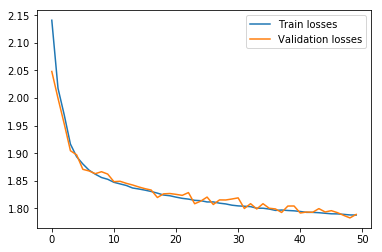

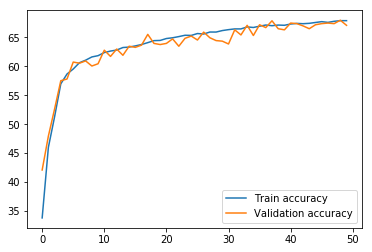

Average training accuracy of the model is: 63.706 %
Accuracy of T - shirt / top is  64.628%
Accuracy of Trouser is  88.427%
Accuracy of Pullover is  61.344%
Accuracy of Dress is  79.078%
Accuracy of Coat is  68.276%
Accuracy of Sandal is  72.562%
Accuracy of Shirt is  0.253%
Accuracy of Sneaker is  83.374%
Accuracy of Bag is  83.164%
Accuracy of Ankleboot is  0.000%



Average validation accuracy of the model is: 63.516 %
Accuracy of T - shirt / top is  64.718%
Accuracy of Trouser is  88.453%
Accuracy of Pullover is  61.405%
Accuracy of Dress is  79.092%
Accuracy of Coat is  68.300%
Accuracy of Sandal is  72.597%
Accuracy of Shirt is  0.251%
Accuracy of Sneaker is  83.400%
Accuracy of Bag is  83.197%
Accuracy of Ankleboot is  0.000%



Test Accuracy of the model on the 10000 test images: 68.68 %
Accuracy of T - shirt / top is  82.100%
Accuracy of Trouser is  93.600%
Accuracy of Pullover is  74.800%
Accuracy of Dress is  86.400%
Accuracy of Coat is  78.400%
Accuracy of Sandal is  88.200

In [28]:
class OneLayerNet(nn.Module):
    def __init__(self):
        super(OneLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        
        
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.softmax(out)
        
        return out
    
model = OneLayerNet()
model = model.to(dev)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

total_step = len(train_loader)
train_losses, val_losses, train_accs, val_accs, val_class_accs, train_class_accs = [],[],[],[],[],[]
val_class_acc = torch.zeros(10)
train_class_acc = torch.zeros(10)

def calculate_acc(labels, outputs):
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return float(correct) / float(total)

def class_acc(labels, predicted):
    for t, p in zip(labels.view(-1), predicted.view(-1)):
      confusion_matrix[t.long(), p.long()] += 1
    return (confusion_matrix.diag()/confusion_matrix.sum(1) * 100)

for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    train_acc = 0
    val_acc = 0
    for images,labels in train_loader:
        images = images.to(dev)
        labels = labels.to(dev)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

         # Track the accuracy
        train_acc += calculate_acc(labels, outputs)
        _, predicted = torch.max(outputs.data, 1)
        train_class_acc += class_acc(labels, predicted)
    else:
        with torch.no_grad():
            model.eval()
            for images,labels in val_loader:
                images = images.to(dev)
                labels = labels.to(dev)

                val_out = model(images)
                loss = criterion(val_out, labels)
                val_loss += loss.item()

                val_acc += calculate_acc(labels, val_out)
                _, predicted = torch.max(val_out.data, 1)
                val_class_acc += class_acc(labels, predicted)
        model.train()

    print("Epoch: {}/{}.. ".format(epoch, num_epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_loader)),
              "Validation Loss: {:.3f}.. ".format(val_loss/len(val_loader)),
              "Training Accuracy: {: .3f}%  ".format(train_acc/len(train_loader)*100),
              "Validation Accuracy: {:.3f}%".format(val_acc/len(val_loader)*100))
    
    train_losses.append(train_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))
    train_accs.append(train_acc/len(train_loader)*100)
    val_accs.append(val_acc/len(val_loader)*100)
    val_class_accs.append(val_class_acc/len(val_loader))
    train_class_accs.append(train_class_acc/len(train_loader))


plt.figure()           
plt.plot(train_losses,label = "Train losses")
plt.plot(val_losses, label = "Validation losses")
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accs,label = "Train accuracy")
plt.plot(val_accs, label = "Validation accuracy")
plt.legend() 
plt.show() 


model.eval()  
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    correct = 0
    total = 0
for images, labels in test_loader:
        images = images.to(dev)
        labels = labels.to(dev)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
            
sum_train_acc = 0
sum_val_acc = 0
for i in range(num_epochs):
  sum_train_acc += train_accs[i]
  sum_val_acc += val_accs[i]

print('Average training accuracy of the model is: {:.3f} %'.format(sum_train_acc / num_epochs))
train_class_accs[:] = [x / num_epochs for x in train_class_accs]
for i in range(len(train_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(train_class_accs[len(train_class_accs)-1][i]).item()))

print('\n\n')
print('Average validation accuracy of the model is: {:.3f} %'.format(sum_val_acc / num_epochs))
val_class_accs[:] = [x / num_epochs for x in val_class_accs]
for i in range(len(val_class_accs[0])):
  print('Accuracy of {} is {: .3f}%'.format(classes[i],(val_class_accs[len(val_class_accs)-1][i]).item()))  
  
print('\n\n')  
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
accs = (confusion_matrix.diag()/confusion_matrix.sum(1) * 100).clone().detach()
for i in range(10):
  print('Accuracy of {} is {: .3f}%'.format(classes[i], accs[i]))

###### 1. After decreasing the no of hidden neurons from 128 (basic model) to 64 we can see that average testing accuracy decreased a bit to 68.68% which is little bit lower than the previous model using momentum term. Due to lesser no of neurons in the hidden layer it is not able to learn the required no of features of images.
###### 2. It is higher than validation and testing accuracy which proves that model does not overfit and generalizes better. Also it has potential to learn further.
###### 3. Class wise accuracy is better on all the three datasets except in case of testing where it is not able to recognize some of the class(es).

###### 4. After evaluating all the models it is observed that the model with momentum term has better accuracy. With high value of momentum and using nesterov approach helps model to look forward in order to reach global minima and takes steps in that direction only.
##### 5. Due to nesterov momentum model takes first step into velocity direction and then make changes to a velocity vector(weight and bias updates) based on a new location which causes oscillation in the path to global minima.
